In [37]:
## library  as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import re
from PIL import Image
import shutil
import xml.etree.ElementTree as et
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns


import numpy as np
import pandas as pd
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
import tensorflow as tf

print(tf.__version__)

tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)
# True

2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# prepare Data

In [3]:
data_dir = '/home/compu/Dataset.orig/pharm/drug/data/'
aug_data_dir = os.path.join(data_dir, 'images')
print(aug_data_dir)
image_dir = os.path.join(data_dir, 'rectangle_img')
print(image_dir)
bbox_dir = os.path.join(data_dir, 'rectangle_annotation')
print(bbox_dir)

/home/compu/Dataset.orig/pharm/drug/data/images
/home/compu/Dataset.orig/pharm/drug/data/rectangle_img
/home/compu/Dataset.orig/pharm/drug/data/rectangle_annotation


In [4]:
for file in os.listdir(aug_data_dir):
#     print(file)
#     print(re.split('[/,-,(,). :]',file)[-1])
    file_format = re.split('[.]',file)[-1]
#     print(os.path.join(image_dir, file))
#     print(os.path.join(aug_data_dir, file))
    if file_format=='jpg':
        shutil.copy(os.path.join(aug_data_dir, file), os.path.join(image_dir, file))
    else:
        shutil.copy(os.path.join(aug_data_dir, file), os.path.join(bbox_dir, file))
        

In [5]:
## image file 수 확인
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))
image_files[:5]

9202


['씨베리움캡슐.jpg',
 '복합쓸기담연질캡슐.jpg',
 'after_AddToBrightness16_누코미트캡슐200밀리그램.jpg',
 'after_AddToBrightness23_엘도브론캡슐300밀리그램.jpg',
 'after_gauusianBlur40_네오로신캡슐.jpg']

In [7]:
#class수 확인: 중복을 허용하지 않는 set을 사용
class_list = set()
for image_file in image_files:
    file_name = re.split('[/,(,). :, _]',image_file)[-2]
    class_name = re.split('[/,(,). :, _]',image_file)[-2]
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))

102


In [8]:
class_list.sort()
class_list[:5]

['가네탑에스연질캡슐', '가바로닌캡슐100mg', '가바틴캡슐300밀리그람', '나리센연질캡슐', '나이시드캡슐150㎎']

In [9]:
class_list[1]

'가바로닌캡슐100mg'

In [10]:
class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'가네탑에스연질캡슐': 0,
 '가바로닌캡슐100mg': 1,
 '가바틴캡슐300밀리그람': 2,
 '나리센연질캡슐': 3,
 '나이시드캡슐150㎎': 4,
 '나프민캡슐': 5,
 '네오로신캡슐': 6,
 '넥사졸캡슐20밀리그램': 7,
 '넬슨세픽심캡슐': 8,
 '누코미트캡슐200밀리그램': 9,
 '뉴로낙CR정': 10,
 '뉴트로필정': 11,
 '다이뉴에이치알정': 12,
 '다이피릴엠정2': 13,
 '대우세파클러캡슐250밀리그램': 14,
 '독시라마이신캡슐100mg': 15,
 '동인당은행엽엑스정': 16,
 '두타반플러스정': 17,
 '드로본정150밀리그램': 18,
 '디': 19,
 '디젠정': 20,
 '레벡스캡슐': 21,
 '로텐연질캡슐': 22,
 '로페란캡슐': 23,
 '리드덴타캡슐': 24,
 '리드미캡슐': 25,
 '리리베아캡슐75mg': 26,
 '리버플란연질캡슐': 27,
 '린코신캡슐': 28,
 '메바론정': 29,
 '뮤코원캡슐': 30,
 '베아라제정': 31,
 '벤포킹정': 32,
 '보령독시플루리딘캡슐100밀리그램': 33,
 '복합쓸기담연질캡슐': 34,
 '부코펜정': 35,
 '브라덱신캡슐': 36,
 '비스펜틴조절방출캡슐10mg': 37,
 '비타마인연질캡슐': 38,
 '비타코플러스연질캡슐': 39,
 '빅톤연질캡슐': 40,
 '빅파워비타연질캡슐': 41,
 '삼진제테파캅셀': 42,
 '설포린캡슐': 43,
 '세푸르엠정250mg': 44,
 '세프로캅셀': 45,
 '셀막비타연질캡슐': 46,
 '셀벡스캡슐': 47,
 '스파졸캡슐': 48,
 '시세틴20밀리그램캡슐': 49,
 '실로스타엠서방캡슐200밀리그램': 50,
 '실로스탄씨알정200밀리그램': 51,
 '씨베리움캡슐': 52,
 '아노벤캅셀': 53,
 '아세테밍정': 54,
 '아세트라셋정': 55,
 '아웃콜코정': 56,
 '아웃콜코프캡슐': 57,
 '아크랑캅셀': 58,
 '아트렌캡슐50밀리그램': 59,
 '알리코이부

In [11]:
class2idx['피도글에이캡슐']

96

In [12]:
## train, validation directory 생성
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [13]:
image_files.sort()

In [14]:
# image_files[500:]

In [15]:
#한 번 했으면 안해도 되는 TRAIN_TEST_SPLIT
# cnt = {}
# previous_class = ""
# for image_file in image_files:
#     file_name = os.path.splitext(image_file)[0]
# #     print(file_name)
#     class_name = re.split('[/,(,). :, _]',file_name)[-1]
# #     print(class_name)
#     if class_name in cnt:
#         cnt[class_name] += 1
#     else:
#         cnt[class_name] = 1
#     if cnt[class_name] <= 80:
#         cpath = train_dir
#     else:
#         cpath = val_dir
#     image_path = os.path.join(image_dir, image_file)
#     shutil.copy(image_path, cpath)
#     previous_class = class_name

In [16]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

In [17]:
print(len(train_images), len(val_images))

9202 1121


In [18]:
train_images[:10]

['씨베리움캡슐.jpg',
 '복합쓸기담연질캡슐.jpg',
 'after_AddToBrightness16_누코미트캡슐200밀리그램.jpg',
 'after_AddToBrightness23_엘도브론캡슐300밀리그램.jpg',
 'after_gauusianBlur40_네오로신캡슐.jpg',
 '에니트정10.jpg',
 '알마믹스정.jpg',
 '오스가바캡슐100밀리그램.jpg',
 '로텐연질캡슐.jpg',
 '삼진제테파캅셀.jpg']

In [19]:
val_images[:10]

['씨베리움캡슐.jpg',
 '복합쓸기담연질캡슐.jpg',
 '에니트정10.jpg',
 '알마믹스정.jpg',
 '오스가바캡슐100밀리그램.jpg',
 '로텐연질캡슐.jpg',
 '삼진제테파캅셀.jpg',
 '원트란서방정.jpg',
 '다이피릴엠정2.jpg',
 '유로비트에스알캡슐4밀리그람.jpg']

##  TFRecord File 만들기

In [20]:
IMG_SIZE = 224

In [21]:
## TFRecord 저장할 directory와 file 경로 설정
tfr_dir = os.path.join(data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')

In [22]:
## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)

In [23]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [24]:
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
  train_path = os.path.join(train_dir, train_file)
  image = Image.open(train_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(train_file)[0] #Bangal_101
  class_name = re.split('[/,(,). :, _]',file_name)[-1]
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_train.write(example.SerializeToString())
  n_train += 1

writer_train.close()
print(n_train)

9202


In [25]:
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
  val_path = os.path.join(val_dir, val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(val_file)[0] #Bangal_101
  class_name = re.split('[/,(,). :, _]',file_name)[-1]
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1

writer_val.close()
print(n_val)

1121


## Classification

In [53]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 30
N_BATCH = 40
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH#STEPS_PER_EPOCH =n_train//batch_size # len(train_data) // batch_size
validation_steps = int(np.ceil(N_VAL / N_BATCH))#VALIDATION_STEPS = n_val//batch_size # len(valid_data) // batch_size

In [27]:
# BATCH_SIZE = 16
# STEPS_PER_EPOCH =n_train//batch_size # len(train_data) // batch_size
# EPOCHS = 15
# VALIDATION_STEPS = n_val//batch_size # len(valid_data) // batch_size
# LEARNING_RATE = 1e-4 
# INPUT_SHAPE = (224, 224, 3)

In [28]:
## tfrecord file을 data로 parsing해주는 function
def _parse_function(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string),
              'cls_num': tf.io.FixedLenFeature([], tf.int64)
             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    image = tf.cast(image, tf.float32)/255. 

    label = tf.cast(parsed_features['cls_num'], tf.int64)
    label = tf.one_hot(label, N_CLASS)

    return image, label

In [29]:
## train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=N_TRAIN).prefetch(
    tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()


In [30]:
## validation dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

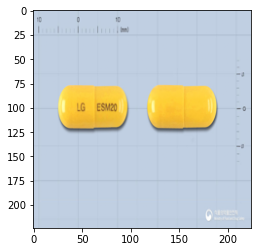

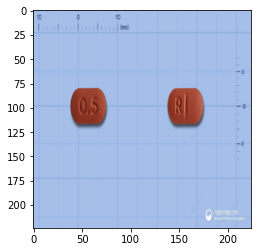

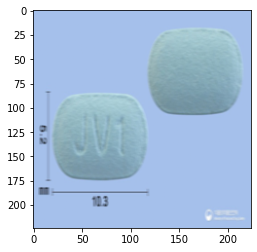

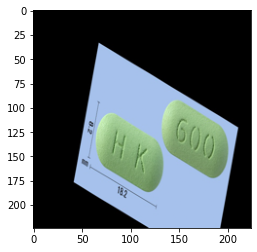

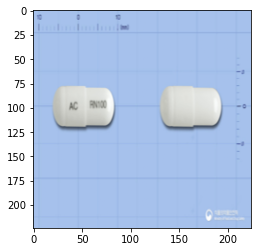

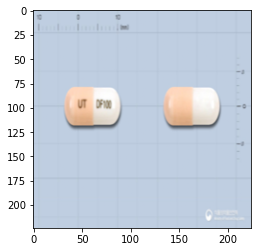

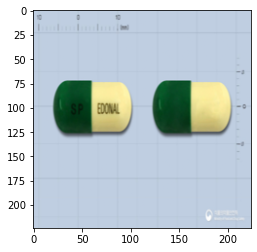

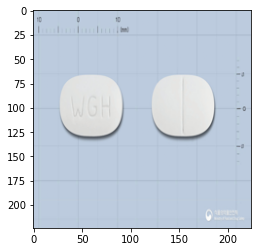

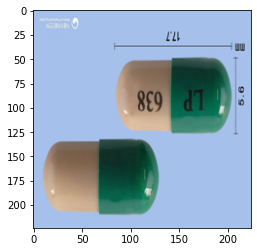

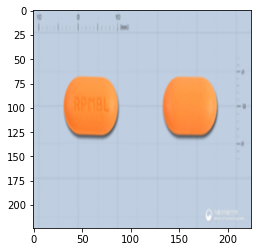

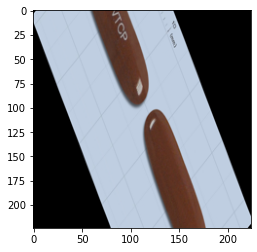

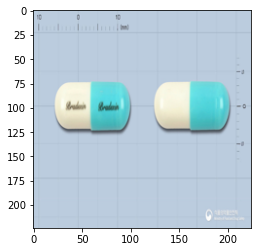

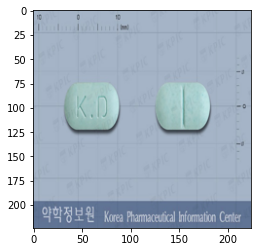

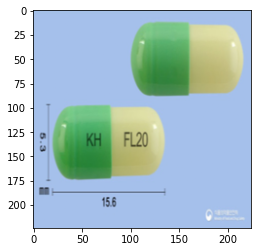

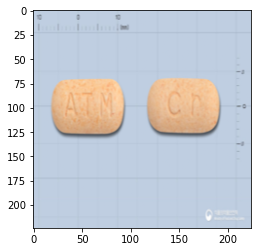

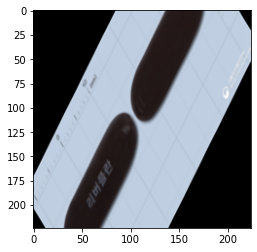

In [31]:
for image, label in train_dataset.take(1):
  for i in range(N_BATCH):    
#     print(label[i].numpy())
    plt.imshow(image[i])
    plt.show()

In [32]:
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D

In [33]:
mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [34]:
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [35]:
def create_mv_model():
    # 새로운 모델 생성하기
    last = mobilenetv2.output
    x = GlobalAveragePooling2D()(last)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    pred = Dense(N_CLASS, activation='softmax')(x)
    
    model = Model(mobilenetv2.input, pred)
    model.summary
    return model
#   model = models.Sequential()
#   model.add(mobilenetv2)
#   model.add(GlobalAveragePooling2D())
#   model.add(Dense(256))
#   model.add(BatchNormalization())
#   model.add(ReLU())
#   model.add(Dense(N_CLASS, activation='softmax'))
#   return model

In [38]:
## Create model, compile & summary
model = create_mv_model()

LR_INIT = 0.000001
LR_MAX = 0.0002
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
  if epoch < RAMPUP_EPOCH:
    lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
  else:
    lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
  return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

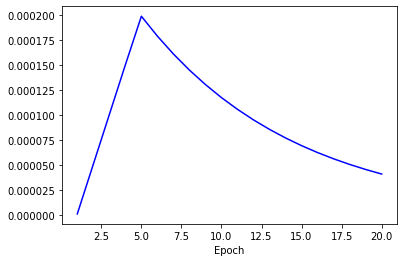

In [39]:
def plot_lr():
  lr = []
  epoch_list = list(np.arange(N_EPOCHS) + 1)
  for epoch in range(N_EPOCHS):
    lr.append(lr_schedule_fn(epoch))    
  plt.plot(epoch_list, lr, 'b-')
  plt.xlabel('Epoch')
  plt.show()

plot_lr()

In [54]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[lr_callback]
)

Epoch 1/30
231/230 [==============================] - 14s 61ms/step - loss: 0.8011 - accuracy: 0.9997 - val_loss: 0.8156 - val_accuracy: 1.0000 - lr: 1.0000e-06
Epoch 2/30
231/230 [==============================] - 14s 62ms/step - loss: 0.7994 - accuracy: 1.0000 - val_loss: 0.8140 - val_accuracy: 1.0000 - lr: 5.0750e-05
Epoch 3/30
231/230 [==============================] - 15s 64ms/step - loss: 0.8153 - accuracy: 0.9992 - val_loss: 0.8613 - val_accuracy: 0.9914 - lr: 1.0050e-04
Epoch 4/30
231/230 [==============================] - 14s 63ms/step - loss: 0.8330 - accuracy: 0.9959 - val_loss: 1.0102 - val_accuracy: 0.9569 - lr: 1.5025e-04
Epoch 5/30
231/230 [==============================] - 15s 64ms/step - loss: 0.8755 - accuracy: 0.9880 - val_loss: 1.0864 - val_accuracy: 0.9547 - lr: 1.9900e-04
Epoch 6/30
231/230 [==============================] - 14s 62ms/step - loss: 0.8762 - accuracy: 0.9884 - val_loss: 0.9212 - val_accuracy: 0.9828 - lr: 1.7910e-04
Epoch 7/30
231/230 [==============

In [55]:
#save model and weight

model.save('Pill_image_pretrained_mobile_model_2.h5')

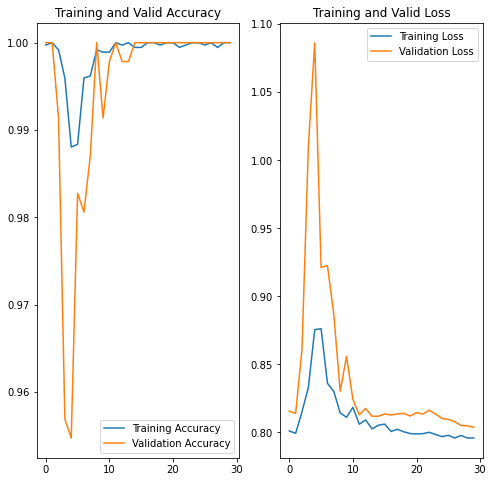

In [56]:
# loss, acc curve

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(N_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Valid Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Valid Loss')
plt.show()

# 새로운 Image로 Test하기

In [106]:
def test(img_dir):
    image = Image.open(img_dir)
    image = image.resize((224, 224))
    image = np.array(image)
    image = image/255.
    
    plt.imshow(image)
    plt.show()
    
    image = np.reshape(image, (1, 224, 224, 3))
    
    prediction = model.predict(image)
    prediction.shape
    pred_class = np.argmax(prediction, axis=-1)
    pred_class
    
    print("예측: ", class_list[int(pred_class)])

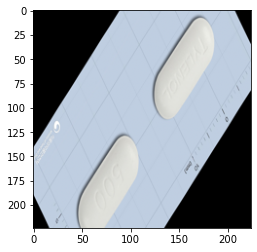

예측:  타이레놀정500밀리그람


In [58]:
test('/home/compu/Dataset.orig/pharm/drug/data/rectangle_img/after_Rotate3_타이레놀정500밀리그람.jpg')

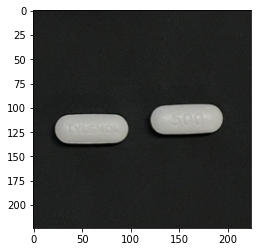

예측:  타이레놀정500밀리그람


In [59]:
test('/home/compu/Downloads/IMG_0639.JPG')

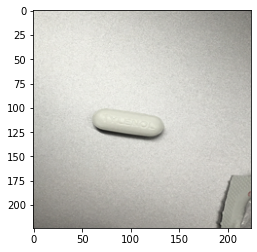

예측:  파미버정


In [110]:
test('/home/compu/Downloads/IMG_0640.JPG')

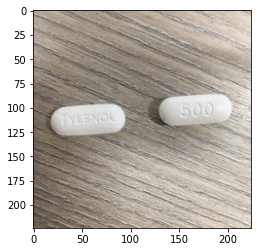

예측:  파미버정


In [112]:
test('/home/compu/Downloads/IMG_0635.JPG')

In [65]:
test_folder_dir = '/home/compu/Dataset.orig/pharm/drug/data/rectangle_img'
test_folders = os.listdir(test_folder_dir)

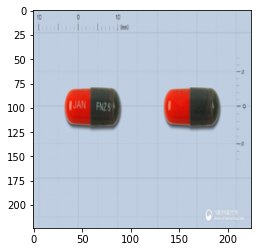

예측:  씨베리움캡슐
정답:  씨베리움캡슐


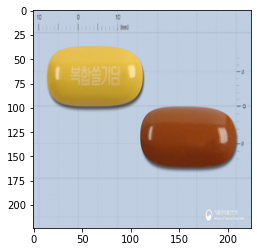

예측:  복합쓸기담연질캡슐
정답:  복합쓸기담연질캡슐


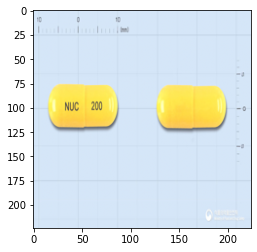

예측:  누코미트캡슐200밀리그램
정답:  누코미트캡슐200밀리그램


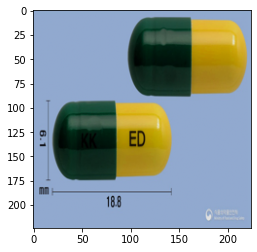

예측:  엘도브론캡슐300밀리그램
정답:  엘도브론캡슐300밀리그램


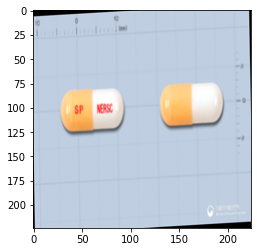

예측:  네오로신캡슐
정답:  네오로신캡슐


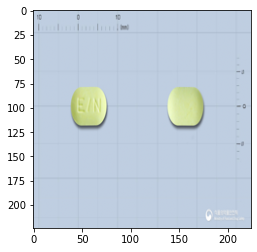

예측:  에니트정10
정답:  에니트정10


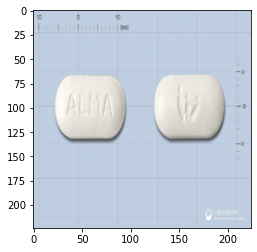

예측:  알마믹스정
정답:  알마믹스정


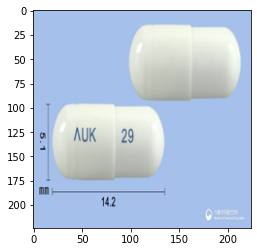

예측:  오스가바캡슐100밀리그램
정답:  오스가바캡슐100밀리그램


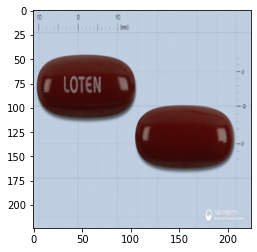

예측:  로텐연질캡슐
정답:  로텐연질캡슐


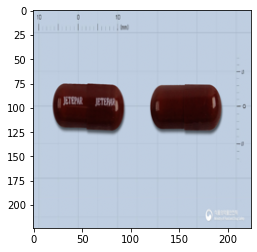

예측:  삼진제테파캅셀
정답:  삼진제테파캅셀


In [66]:
for i in range(10):
    test(os.path.join(test_folder_dir, test_folders[i]))
    print("정답: ", re.split('[/,(,). :, _]',test_folders[i])[-2])

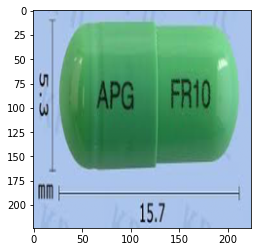

예측:  알보젠레날리도마이드캡슐5밀리그램


In [108]:
test('/home/compu/Downloads/download.jpeg')#정답x

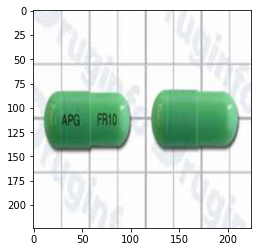

예측:  나리센연질캡슐


In [109]:
test('/home/compu/Downloads/download (1).jpeg')#정답o

# Gradcam

In [73]:
#gradCAM

import tensorflow as tf
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


In [74]:
import os
from PIL import Image
dataDir = './drug_image_class_df/circles/afterAugVal'           # 데이터 위치
classNames = sorted(os.listdir(dataDir))  # 각 클래스의 이름들
numClass = len(classNames)        # Number of classes = number of subdirectories
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]                     # 각 클래스 별 파일 이름들
numEach = [len(imageFiles[i]) for i in range(numClass)]     # 각 클래스 별 파일 갯수
imageFilesList = []               # 모든 파일이름
imageClass = []                   # 각각의 파일들에 대한 클래스 

for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
    
numTotal = len(imageClass)        # 전체 파일 갯수
imageWidth, imageHeight = Image.open(imageFilesList[0]).size         # 각 영상의 사이즈(width, height)

print("There are",numTotal,"images in",numClass,"distinct categories")
print("Label names:",classNames)
print("Label counts:",numEach)
print("Image dimensions:",imageWidth,"x",imageHeight)

There are 2905 images in 100 distinct categories
Label names: ['겔포스디엑스정', '고려칸데사르탄정16밀리그램', '나또밸런스정', '나토실정', '나프민에이정', '노플정', '뉴메살탄정20mg', '대원디아제팜정2밀리그램', '도네시지정10밀리그램', '도미다정', '둘록사정30밀리그램', '라사린정0', '라사핀정0', '락토실정', '란스파졸정', '레보스필정', '레보피드정', '레프리드정', '록소젠정', '리마론정', '메레인정', '메바로친정5밀리그램', '뮤코렌정', '바르젠정', '바필정300mg', '베타투정', '보령톨터로딘서방정4밀리그램', '브레디닌정50밀리그램', '브로카민정', '사포엔정', '삼성에스오메프라졸정20밀리그램', '센토실정', '솔리테어정5mg', '솔페나신정10밀리그램', '슈다페드정', '슈스타정10밀리그램', '실타졸정', '씨트렐린구강붕해정5밀리그램', '아가펜정', '아데팜정10밀리그램', '아름정', '아스텍트정', '아시바정', '아진탈정', '아테논정', '아텐정', '안티콘정', '안플리코정', '알러몬트츄정5mg', '알마볼정', '액스타존정', '에나톡신정', '에드린정', '에스올정20밀리그램', '오부틴정', '오스틴라니티딘염산염정150mg', '올란자정10mg', '올메딘정20밀리그램', '유로알파엑스엘정', '유로픽스정', '유리모큐정0', '이달비정80밀리그램', '이라졸정', '이탄돌플러스정', '이텍스시메티딘정', '이토피드정', '이트코젠정', '인브록솔정', '인트랙정6', '저니스타서방정8밀리그램', '칼디벡스츄어블정', '케이엠에스돔페리돈정', '케티맥스정100밀리그램', '콤비팜정', '쿠에타핀정12', '큐란정', '큐로켈서방정50밀리그램', '크레로스정10mg', '크레진정20밀리그램', '테바엘로티닙정100mg', '토르셈정10밀리그램', '트란시노2정', '트리티코정50밀리그람', '트리페손정', '티파론정', '파모딘정

Predicted: 콘티푸로스연질캡슐
정답:  콘티푸로스연질캡슐


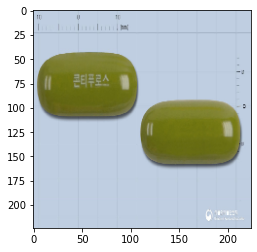

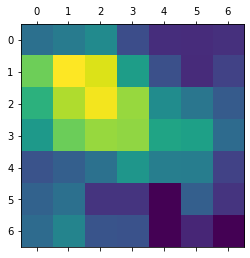

In [104]:
# Select a random query image
import random

inum = random.randrange(0,len(test_folders))
qimage0 = load_img(os.path.join(test_folder_dir, test_folders[inum]), target_size=(224, 224))
qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = preprocess_input(qimage)


# Print what the top predicted class is
preds = model.predict(qimage)
predicted_label = np.argmax(preds[0],axis=-1)
print("Predicted:", class_list[int(predicted_label)])
print("정답: ", re.split('[/,(,). :, _]',test_folders[inum])[-2])


# Generate class activation heatmap
last_conv_layer_name = "Conv_1"
classifier_layer_names = [
    "global_average_pooling2d_1",
    "dense_2" 
    ]
heatmap = make_gradcam_heatmap(
    qimage, model, last_conv_layer_name, classifier_layer_names
    )

# Display heatmap
plt.imshow(qimage0)
plt.show()
plt.matshow(heatmap)
plt.show()

Predicted: 시세틴20밀리그램캡슐
정답:  시세틴20밀리그램캡슐


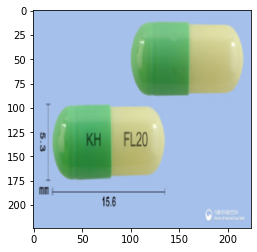

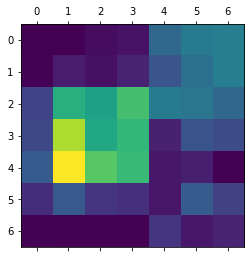

Predicted: 가바로닌캡슐100mg
정답:  가바로닌캡슐100mg


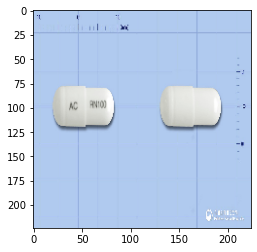

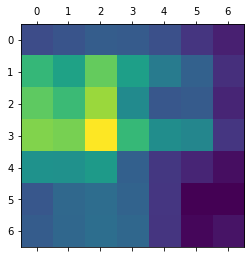

Predicted: 셀막비타연질캡슐
정답:  셀막비타연질캡슐


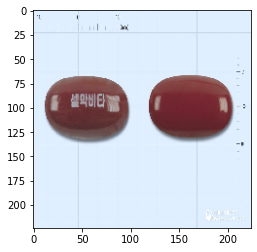

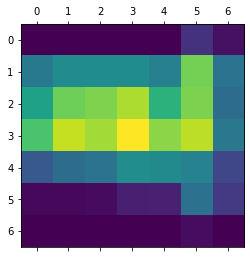

Predicted: 보령독시플루리딘캡슐100밀리그램
정답:  보령독시플루리딘캡슐100밀리그램


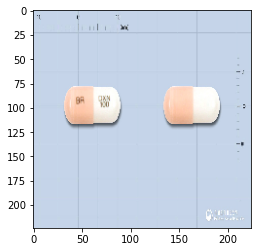

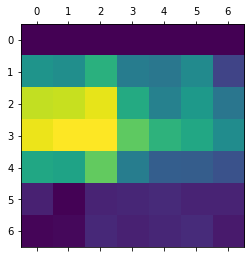

Predicted: 알마믹스정
정답:  알마믹스정


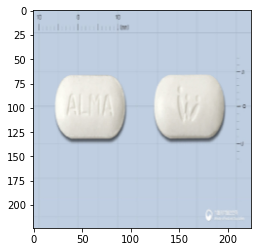

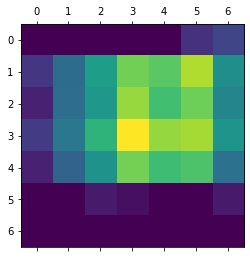

Predicted: 뮤코원캡슐
정답:  뮤코원캡슐


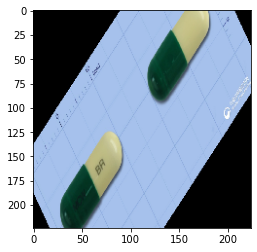

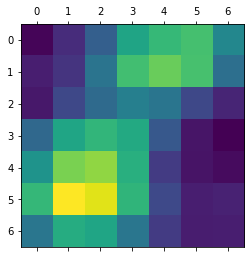

Predicted: 삼진제테파캅셀
정답:  삼진제테파캅셀


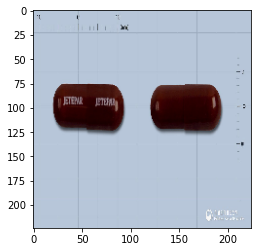

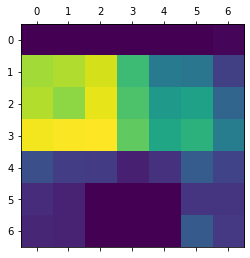

Predicted: 뮤코원캡슐
정답:  뮤코원캡슐


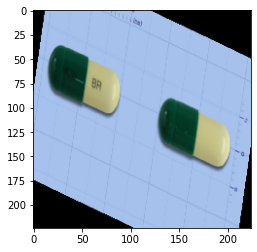

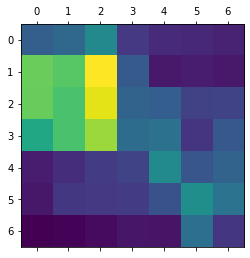

Predicted: 콘티푸로스연질캡슐
정답:  콘티푸로스연질캡슐


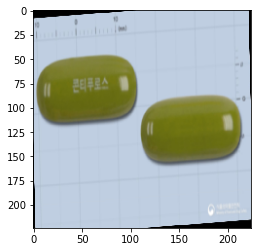

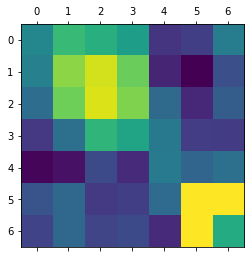

Predicted: 타이노즈연질캡슐
정답:  타이노즈연질캡슐


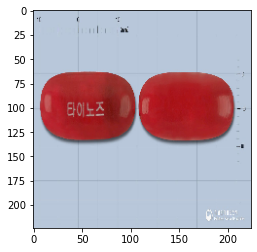

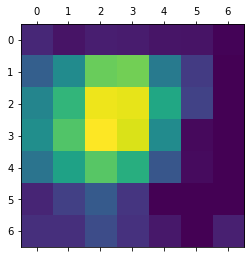

In [102]:
for i in range(10):
    inum = random.randrange(0,len(test_folders))
    qimage0 = load_img(os.path.join(test_folder_dir, test_folders[inum]), target_size=(224, 224))
    qimage  = img_to_array(qimage0)
    qimage  = qimage.reshape((1, 224, 224, 3))
    qimage  = preprocess_input(qimage)


    # Print what the top predicted class is
    preds = model.predict(qimage)
    predicted_label = np.argmax(preds,axis=-1)
    print("Predicted:", class_list[int(predicted_label)])
    print("정답: ", re.split('[/,(,). :, _]',test_folders[inum])[-2])


    # Generate class activation heatmap
    last_conv_layer_name = "Conv_1"
    classifier_layer_names = [
        "global_average_pooling2d_1",
        "dense_2" 
        ]
    heatmap = make_gradcam_heatmap(
        qimage, model, last_conv_layer_name, classifier_layer_names
        )

    # Display heatmap
    plt.imshow(qimage0)
    plt.show()
    plt.matshow(heatmap)
    plt.show()

In [127]:
def gradcam(test_dir):
    qimage0 = load_img(test_dir, target_size=(224, 224))
    qimage  = img_to_array(qimage0)
    qimage  = qimage.reshape((1, 224, 224, 3))
    qimage  = preprocess_input(qimage)


    # Print what the top predicted class is
    preds = model.predict(qimage)
    predicted_label = np.argmax(preds,axis=-1)
    print("Predicted:", class_list[int(predicted_label)])
    print("정답: ", re.split('[/,(,). :, _]',test_dir)[-2])


    # Generate class activation heatmap
    last_conv_layer_name = "Conv_1"
    classifier_layer_names = [
        "global_average_pooling2d_1",
        "dense_2" 
        ]
    heatmap = make_gradcam_heatmap(
        qimage, model, last_conv_layer_name, classifier_layer_names
        )

    # Display heatmap
    plt.imshow(qimage0)
    plt.show()
    plt.matshow(heatmap)
    plt.show()
    

Predicted: 복합쓸기담연질캡슐
정답:  복합쓸기담연질


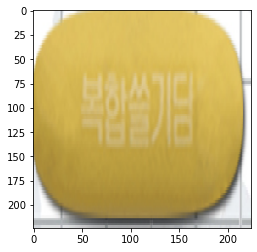

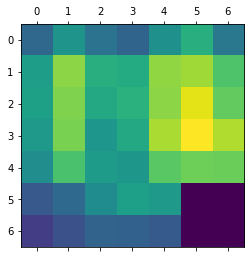

In [130]:
gradcam('/home/compu/Downloads/복합쓸기담연질.png')

Predicted: 아세테밍정
정답:  복합쓸기담연질


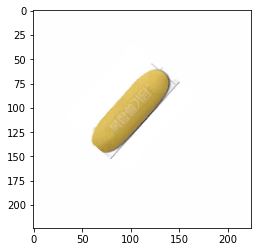

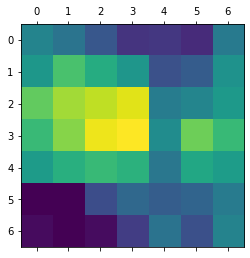

In [133]:
gradcam('/home/compu/Downloads/2_복합쓸기담연질.jpg')

Predicted: 복합쓸기담연질캡슐
정답:  복합쓸기담연질


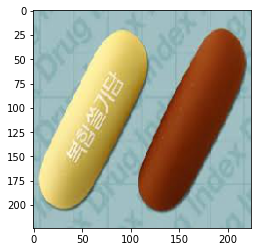

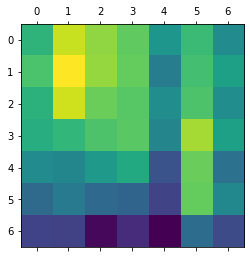

In [138]:
gradcam('/home/compu/Downloads/3_복합쓸기담연질.jpeg')

Predicted: 넬슨세픽심캡슐
정답:  복합쓸기담연질


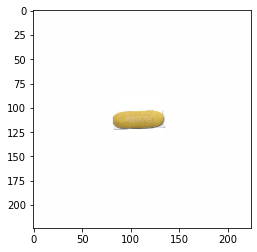

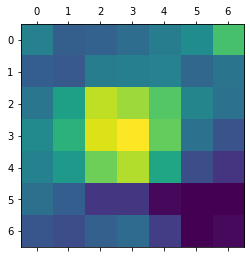

In [139]:
gradcam('/home/compu/Downloads/4_복합쓸기담연질.jpg')

Predicted: 복합쓸기담연질캡슐
정답:  복합쓸기담연질


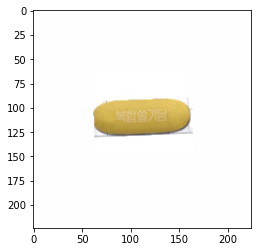

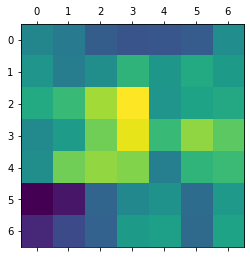

In [140]:
gradcam('/home/compu/Downloads/5_복합쓸기담연질.jpg')

1. 약의 비율이 맞지 않음에도 정답을 맞춤
2. 기울기가 기울어져있어도 정답을 맞춤
3. 배경 색, 약간의 노이즈에도 불구하고 정답을 맞춤
4. 너무 작으면 예측을 못하지만 어느정도 글씨를 알아볼 수 있을 정도로 찍으면 정답을 맞춤
5. 알약을 하나만 찍어도 정답을 맞춤(그러나 어느정도의 위험성은 있음 이유는 아래에..)

실제 학습시킨 이미지
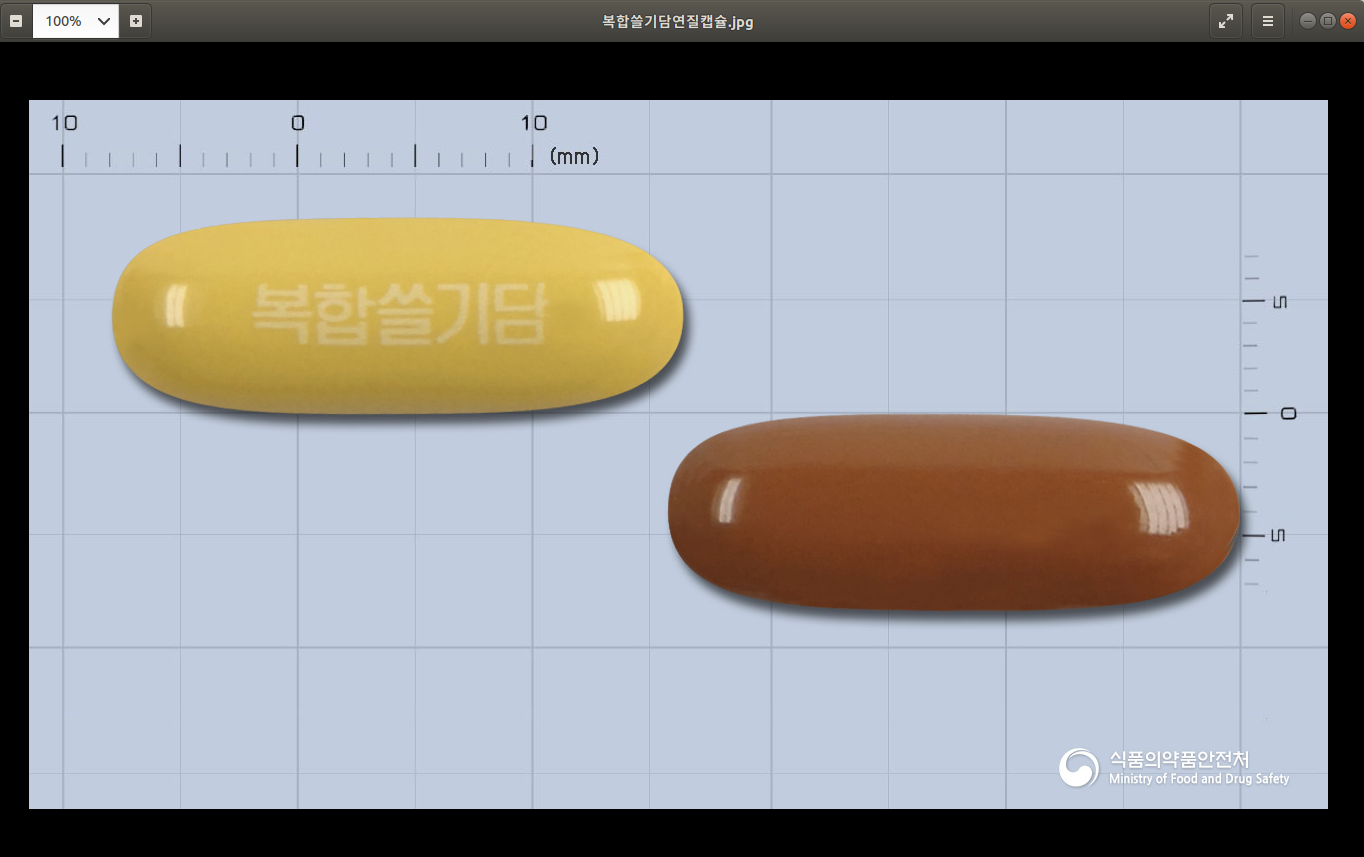

### 알약을 한쪽 면만 찍는 것의 위험성

1. 사용자가 글자가 없는 뒷면만을 찍을 경우 비슷한 알약이 매우 많다. (그래도 알약 하나만 찍는것이 UX상 좋다고 본다면, '글자가 있는 면을 찍어주세요' 라는 안내문구가 필요할 것이다. )


ex)
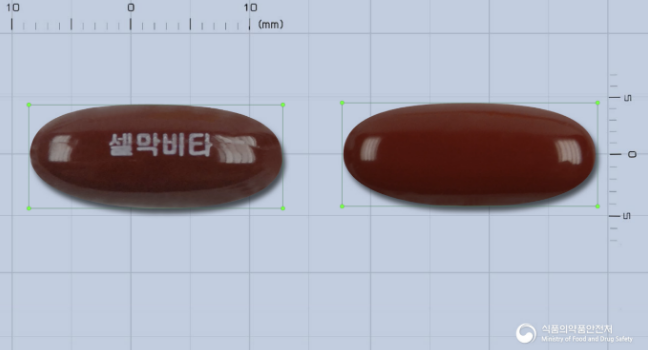


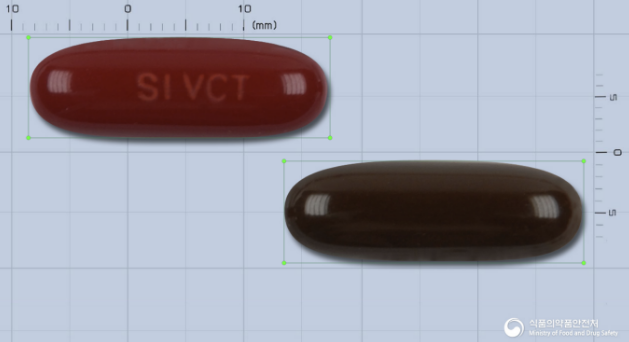

2. 양 면에 모두 글자가 있는 알약이 많은데, '글자가 잇는 면을 찍어주세요'라고 했을 때, 같은 글자가 적혀있는 알약이 많다. 
ex)
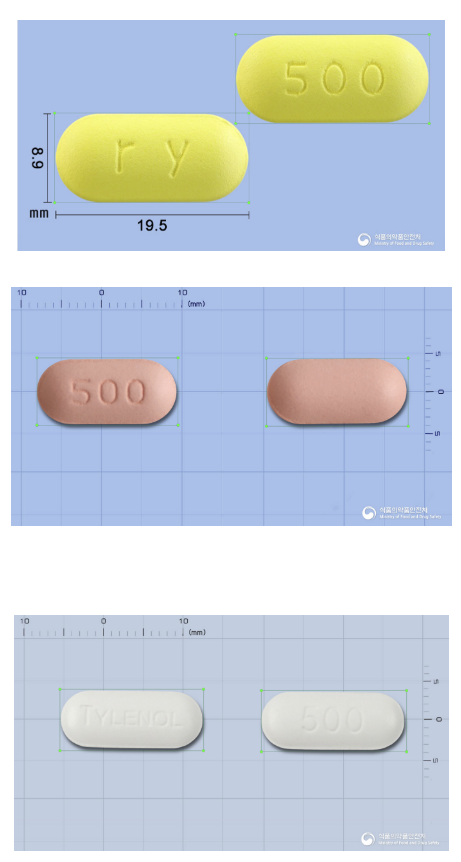